[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ElMartinez31/Data_Science/blob/main/Projects/Classical_Frameworks/CIFAR-10 Image Classification.ipynb)

We have worked on the MNIST dataset to perform digit recognition on 28x28 pixels grayscale images.

We now want to go a step further performing kind of the same but on CIFAR-10 dataset that countains colored 32x32 images of different kind (trucks, birds...)

In [ ]:
# We have download the train and test folders from kaggle.
# Train 60K images
# So what the best way to read and use this data

In [ ]:
# Etapes
#Charger les images depuis le dossier train.
#Charger les labels depuis le fichier trainLabels.csv.
#Assurer que chaque image correspond √† son label.
#Redimensionner et normaliser les images.
#Diviser les donn√©es en ensembles d'entra√Ænement et de validation.

In [ ]:
import os
import pandas as pd
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# We saw that reading one by one the 50k i√πages from drive takes more than 10hours
# We then make a copy of the folder on the local env of colab, then we use it

#path_folder = "/content/drive/Othercomputers/Mon ordinateur portable/Data Science/CIFAR/train"

condition = False # Data already downloaded and preprocessed

if condition == True:

  !mkdir -p /content/cifar10
  #!cp -r "/content/drive/Othercomputers/Mon ordinateur portable/Data Science/CIFAR/train" /content/cifar10/
  !rsync -ah --progress "/content/drive/Othercomputers/Mon ordinateur portable/Data Science/CIFAR/train" /content/cifar10/
else:
  print("data already there!")

data already there!


In [ ]:
#train_folder_path = "/content/drive/Othercomputers/Mon ordinateur portable/Data Science/CIFAR/train"
train_folder_path ="/content/cifar10/train"
train_labels = pd.read_csv("/content/drive/Othercomputers/Mon ordinateur portable/Data Science/CIFAR/trainLabels.csv")

In [ ]:
train_labels.head()
# Charger les labels depuis le fichier CSV
# On constate que les noms des images dans le folder train correspond aux IDs dans train_labels
# la 1ere image de train est 1.png et correspond bien a une frog
# de meme pour les suivantes

train_labels["filename"] = train_labels['id'].astype(str)+".png"
train_labels

#add folder path to the filename to have compelte path
train_labels["filename"] = train_labels["filename"].apply(lambda x : os.path.join(train_folder_path,x))
train_labels.iloc[0]["filename"]# looks ok



'/content/cifar10/train/1.png'

In [ ]:
# now can we plot them?
plt.figure()
for idx,img_name in enumerate(train_labels["filename"][0:20]):
  print(img_name,train_labels["label"][idx])
  img = cv2.imread(img_name)

  if img is not None: # Some of the images were not loaded correctly, so they are "None"
    print(img.shape)
    plt.imshow(img)
    plt.show()

# The results are ok, even tho in 32x32 the images are quite blurry
# img.shape = (32,32,3)

/content/cifar10/train/1.png frog
/content/cifar10/train/2.png truck
/content/cifar10/train/3.png truck
/content/cifar10/train/4.png deer
/content/cifar10/train/5.png automobile
/content/cifar10/train/6.png automobile
/content/cifar10/train/7.png bird
/content/cifar10/train/8.png horse
/content/cifar10/train/9.png ship
/content/cifar10/train/10.png cat
/content/cifar10/train/11.png deer
/content/cifar10/train/12.png horse
/content/cifar10/train/13.png horse
/content/cifar10/train/14.png bird
/content/cifar10/train/15.png truck
/content/cifar10/train/16.png truck
/content/cifar10/train/17.png truck
/content/cifar10/train/18.png cat
/content/cifar10/train/19.png bird
/content/cifar10/train/20.png frog


<Figure size 640x480 with 0 Axes>

Reshape vs Resize:

Reshape: Ne modifie pas la taille de l'image mais r√©organise les pixels en une nouvelle forme.

resize: Modifie la taille de l'image en l‚Äôagrandissant ou la r√©duisant.
Utilise une interpolation pour estimer les nouvelles valeurs de pixels.


In [ ]:
# Now we are able to load and print some image. Let's define a function that does it automatically
from tqdm import tqdm
import cv2

def load_and_resize_img(img_path):
    img = cv2.imread(img_path)  # Lire l'image
    img = cv2.resize(img, (32, 32))  # Redimensionner
    img = img / 255.0  # Normalisation
    return img

condition = False

if condition == True: # Same idea, data already loaded
  #tqdm pour voir la progression
  image_df = [load_and_resize_img(img_path) for img_path in tqdm(train_labels['filename'], desc="Processing Images")]

  image_df = np.array(image_df, dtype=np.float32) #Convert to float32 instead of 64 (50% memory gain)
  np.save("/content/cifar10_dataset_preprocessed.npy", np.array(image_df))  # Sauvegarde en local
  !cp /content/cifar10_dataset_preprocessed.npy "/content/drive/Othercomputers/Mon ordinateur portable/Data Science/CIFAR/"

else:
  image_df = np.load("/content/drive/Othercomputers/Mon ordinateur portable/Data Science/CIFAR/cifar10_dataset_preprocessed.npy")

image_df

array([[[[0.24705882, 0.24313726, 0.23137255],
         [0.1764706 , 0.18039216, 0.16862746],
         [0.16862746, 0.1882353 , 0.19607843],
         ...,
         [0.42352942, 0.5176471 , 0.61960787],
         [0.4       , 0.49019608, 0.59607846],
         [0.40392157, 0.4862745 , 0.5803922 ]],

        [[0.07843138, 0.07843138, 0.0627451 ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.03137255, 0.07058824],
         ...,
         [0.21568628, 0.34509805, 0.48235294],
         [0.19607843, 0.3254902 , 0.46666667],
         [0.22352941, 0.34117648, 0.47843137]],

        [[0.08235294, 0.09411765, 0.09803922],
         [0.        , 0.02745098, 0.0627451 ],
         [0.03137255, 0.10588235, 0.19215687],
         ...,
         [0.19607843, 0.32941177, 0.4627451 ],
         [0.19607843, 0.32941177, 0.47058824],
         [0.16470589, 0.28627452, 0.42745098]],

        ...,

        [[0.3764706 , 0.6666667 , 0.8156863 ],
         [0.13333334, 0.6       , 0.7882353 ]

In [ ]:
#So now we have our dataset (numpy table image_df) which countains all the preprocessed images.
# We also have train_labels that countains the associated labels

#train_labels.info() 50K rows
image_df.dtype #float32
image_df.shape #(50000, 32, 32, 3)

(50000, 32, 32, 3)

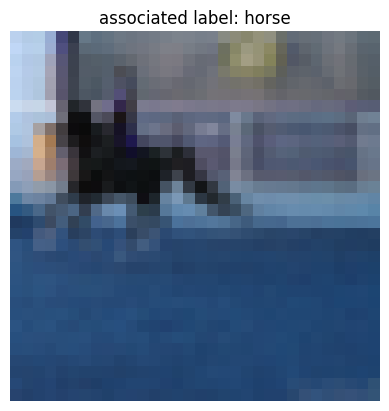

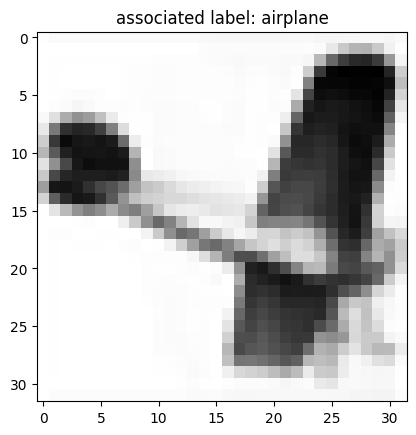

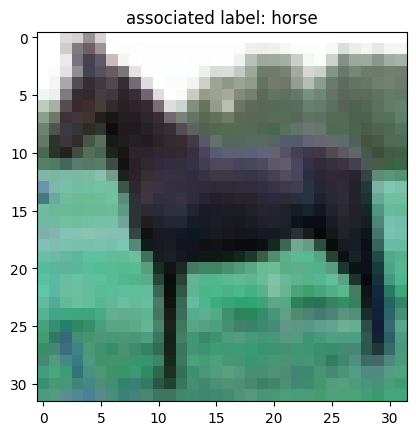

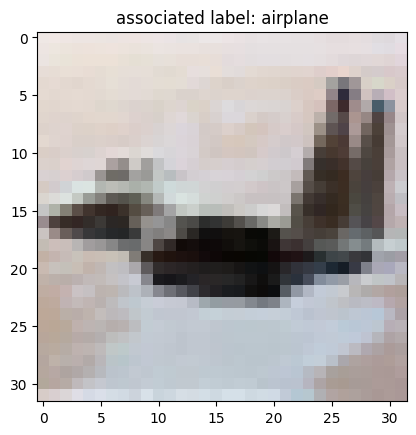

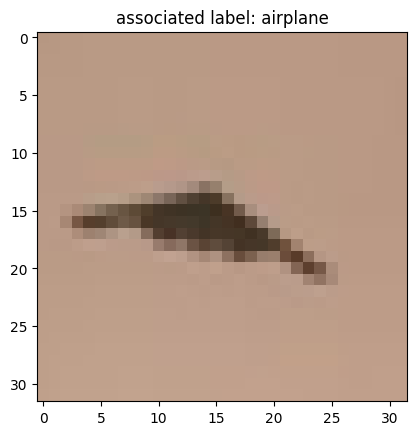

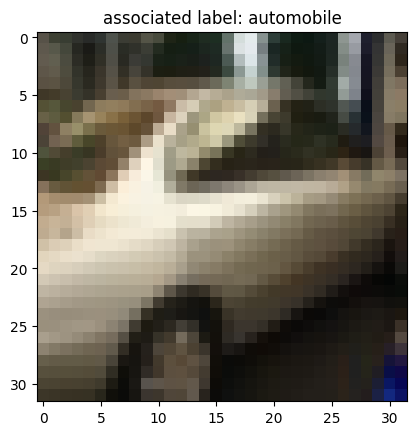

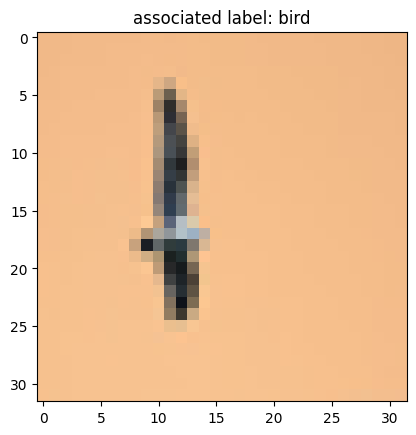

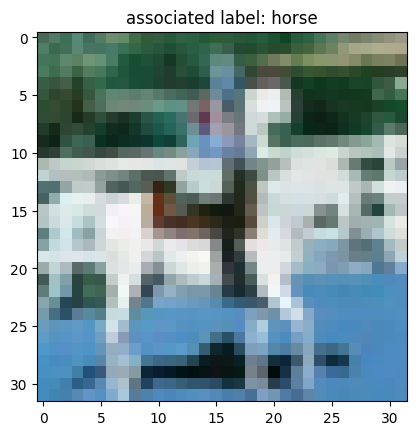

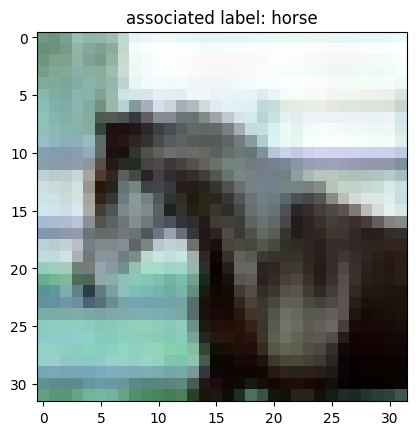

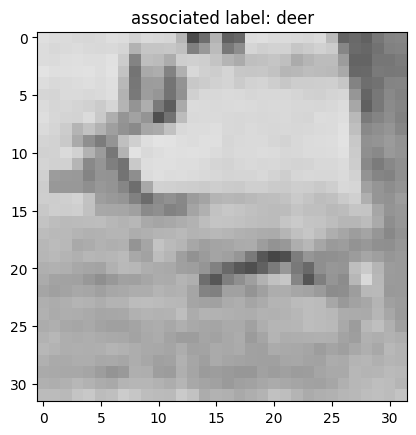

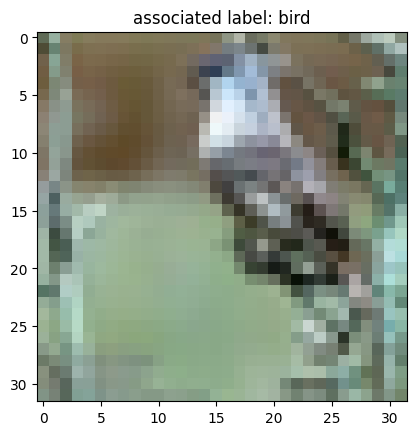

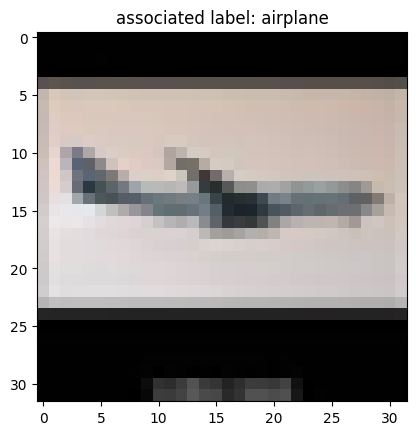

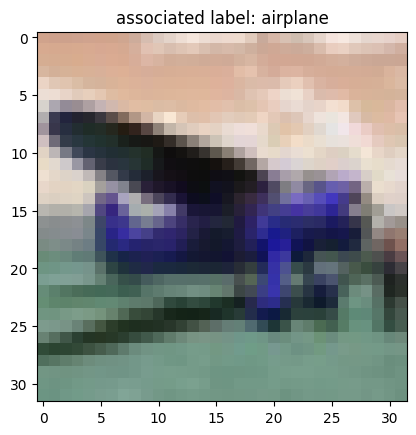

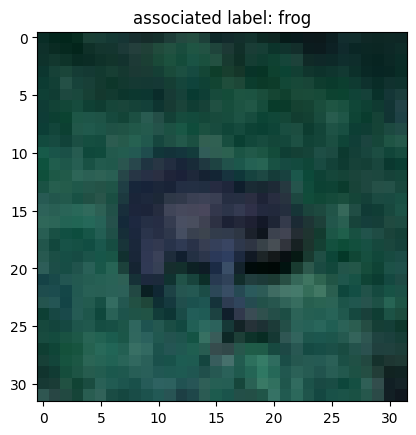

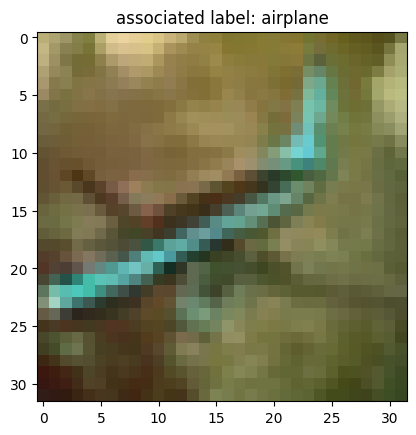

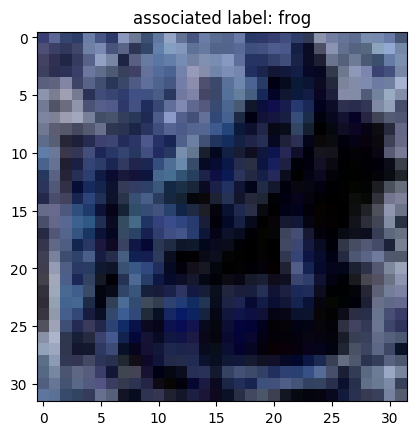

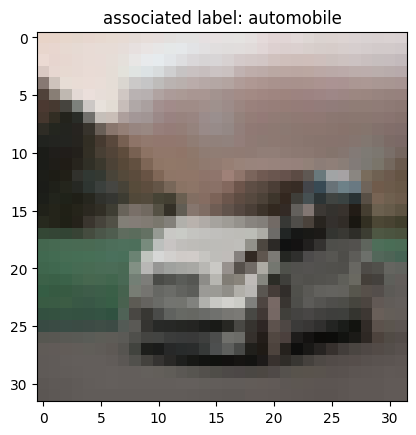

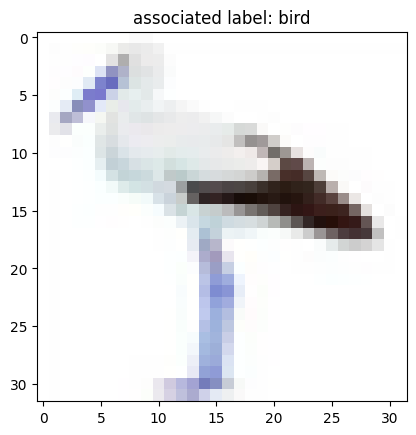

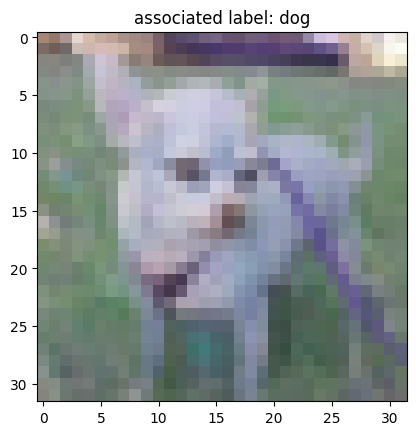

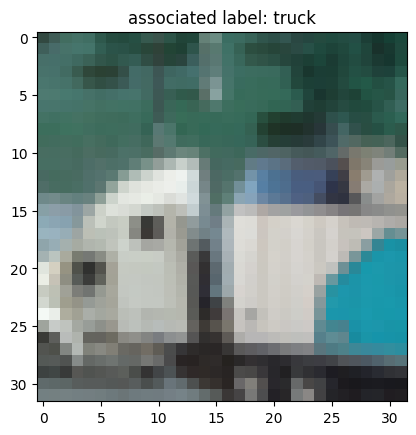

In [ ]:
# Afficher une image et son label correspondant
plt.imshow(image_df[120])  # Affiche la premi√®re image
plt.axis("off")
plt.title(f"associated label: {train_labels['label'][120]}")


#let's take random numbers and see if the label is fine
random_numbers = np.random.randint(0, 50000, size=20)
random_numbers

for idx in random_numbers:
  plt.imshow(image_df[idx])
  plt.title(f"associated label: {train_labels['label'][idx]}")
  plt.show()
# that's perfect!! image_df and labels are aligned

In [ ]:
train_labels["label"].unique()

array(['frog', 'truck', 'deer', 'automobile', 'bird', 'horse', 'ship',
       'cat', 'dog', 'airplane'], dtype=object)

In [ ]:
# Now we need to encode labels with categorical_encoder

# To do that we gonna do with one more step than for MNIST
# We first need to encode the labels as a numeric value (cat -> 0, bird -> 1 ...  truck -> 9)
# Than as with MNIST we to_categorical it to go (0 -> [1000000] .... 9 -> [00000001])
train_labels = pd.read_csv("/content/drive/Othercomputers/Mon ordinateur portable/Data Science/CIFAR/trainLabels.csv")
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Label encode
encoder = LabelEncoder()
train_labels["encoded_label"] = encoder.fit_transform(train_labels["label"])
train_labels # ok

# to_categorical
one_hot_labels= to_categorical(train_labels["encoded_label"], num_classes = 10)

one_hot_labels #Numpy array (50K, 10)

# Regarding the features (image_df), we don't need (as we did for MNIST) to flatten it,
# Conv2D is expecting a (nb_images, 32 ,32 ,3) format


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [ ]:
#Divide features and labels into train valid

X_train, X_valid, Y_train, Y_valid = train_test_split(image_df,one_hot_labels, train_size= 0.8)


In [ ]:
X_train.shape #(40000, 32, 32, 3)
X_valid.shape #(10000, 32, 32, 3)
Y_train.shape #(40000, 10)
Y_valid.shape#(10000, 10)
#So far so good

(10000, 10)

In [ ]:
#### First method using Convolutional NN ############

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


model = Sequential() # Basic model type

# Create convolution layer, with 32 kernels (filters) each one of size 3x3, each filter learns to detect patterns if the img.
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3))) # Padding same means we get same size output as input 32x32x3
model.add(MaxPooling2D((2, 2)))  # Reduce dimensionality, keeping important features
# relu for non_linear stuff

# Other convolutional layer with same idea
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))  # MaxPooling pour r√©duire la dimension spatiale

# Other convolutional layer with same idea
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))  # MaxPooling pour r√©duire la dimension spatiale

# Pourquoi utiliser Flatten dans un CNN ?
# Dans un CNN, les couches convolutives et pooling g√©n√®rent des cartes de caract√©ristiques (feature maps) qui
# conservent la structure spatiale (les dimensions hauteur et largeur) des donn√©es d'entr√©e. Cependant,
# une fois que vous avez extrait ces caract√©ristiques, pour effectuer une t√¢che comme la classification,
#vous avez g√©n√©ralement besoin d'une couche dense qui attend des entr√©es sous forme de vecteur 1D.


#  Flattend data for dense layers
model.add(Flatten())

# Dense layer with dropout for regularization
model.add(Dense(512, activation='relu')) # 512 neurons layer (same MNIST)
model.add(Dropout(0.5))  # Dropout to avoid overfitting, unactivating some neurons during training)

# softmax for n-class classif
model.add(Dense(10, activation='softmax'))  # 10 classes CIFAR-10

# R√©sum√© du mod√®le
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                         ‚îÉ Output Shape                ‚îÉ         Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ conv2d (Conv2D)                      ‚îÇ (None, 32, 32, 32)          ‚îÇ             896 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling2d (MaxPooling2D)         ‚îÇ (None, 16, 16, 32)          ‚îÇ               0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d_1 (Conv2D)                    ‚îÇ (None, 16, 16, 64)          ‚îÇ          18,496 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling2d_1 (MaxPooling2D)       ‚îÇ (None, 8, 8, 64)            ‚îÇ               0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d_2 (Conv2D)                    ‚îÇ (None, 8, 8, 128)           ‚îÇ          73,856 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling2d_2 (MaxPooling2D)       ‚îÇ (None, 4, 4, 128)           ‚îÇ               0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ flatten (Flatten)                    ‚îÇ (None, 2048)                ‚îÇ               0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense (Dense)                        ‚îÇ (None, 512)                 ‚îÇ       1,049,088 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout (Dropout)                    ‚îÇ (None, 512)                 ‚îÇ               0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_1 (Dense)                      ‚îÇ (None, 10)                  ‚îÇ           5,130 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

 Total params: 1,147,466 (4.38 MB)

 Trainable params: 1,147,466 (4.38 MB)

 Non-trainable params: 0 (0.00 B)

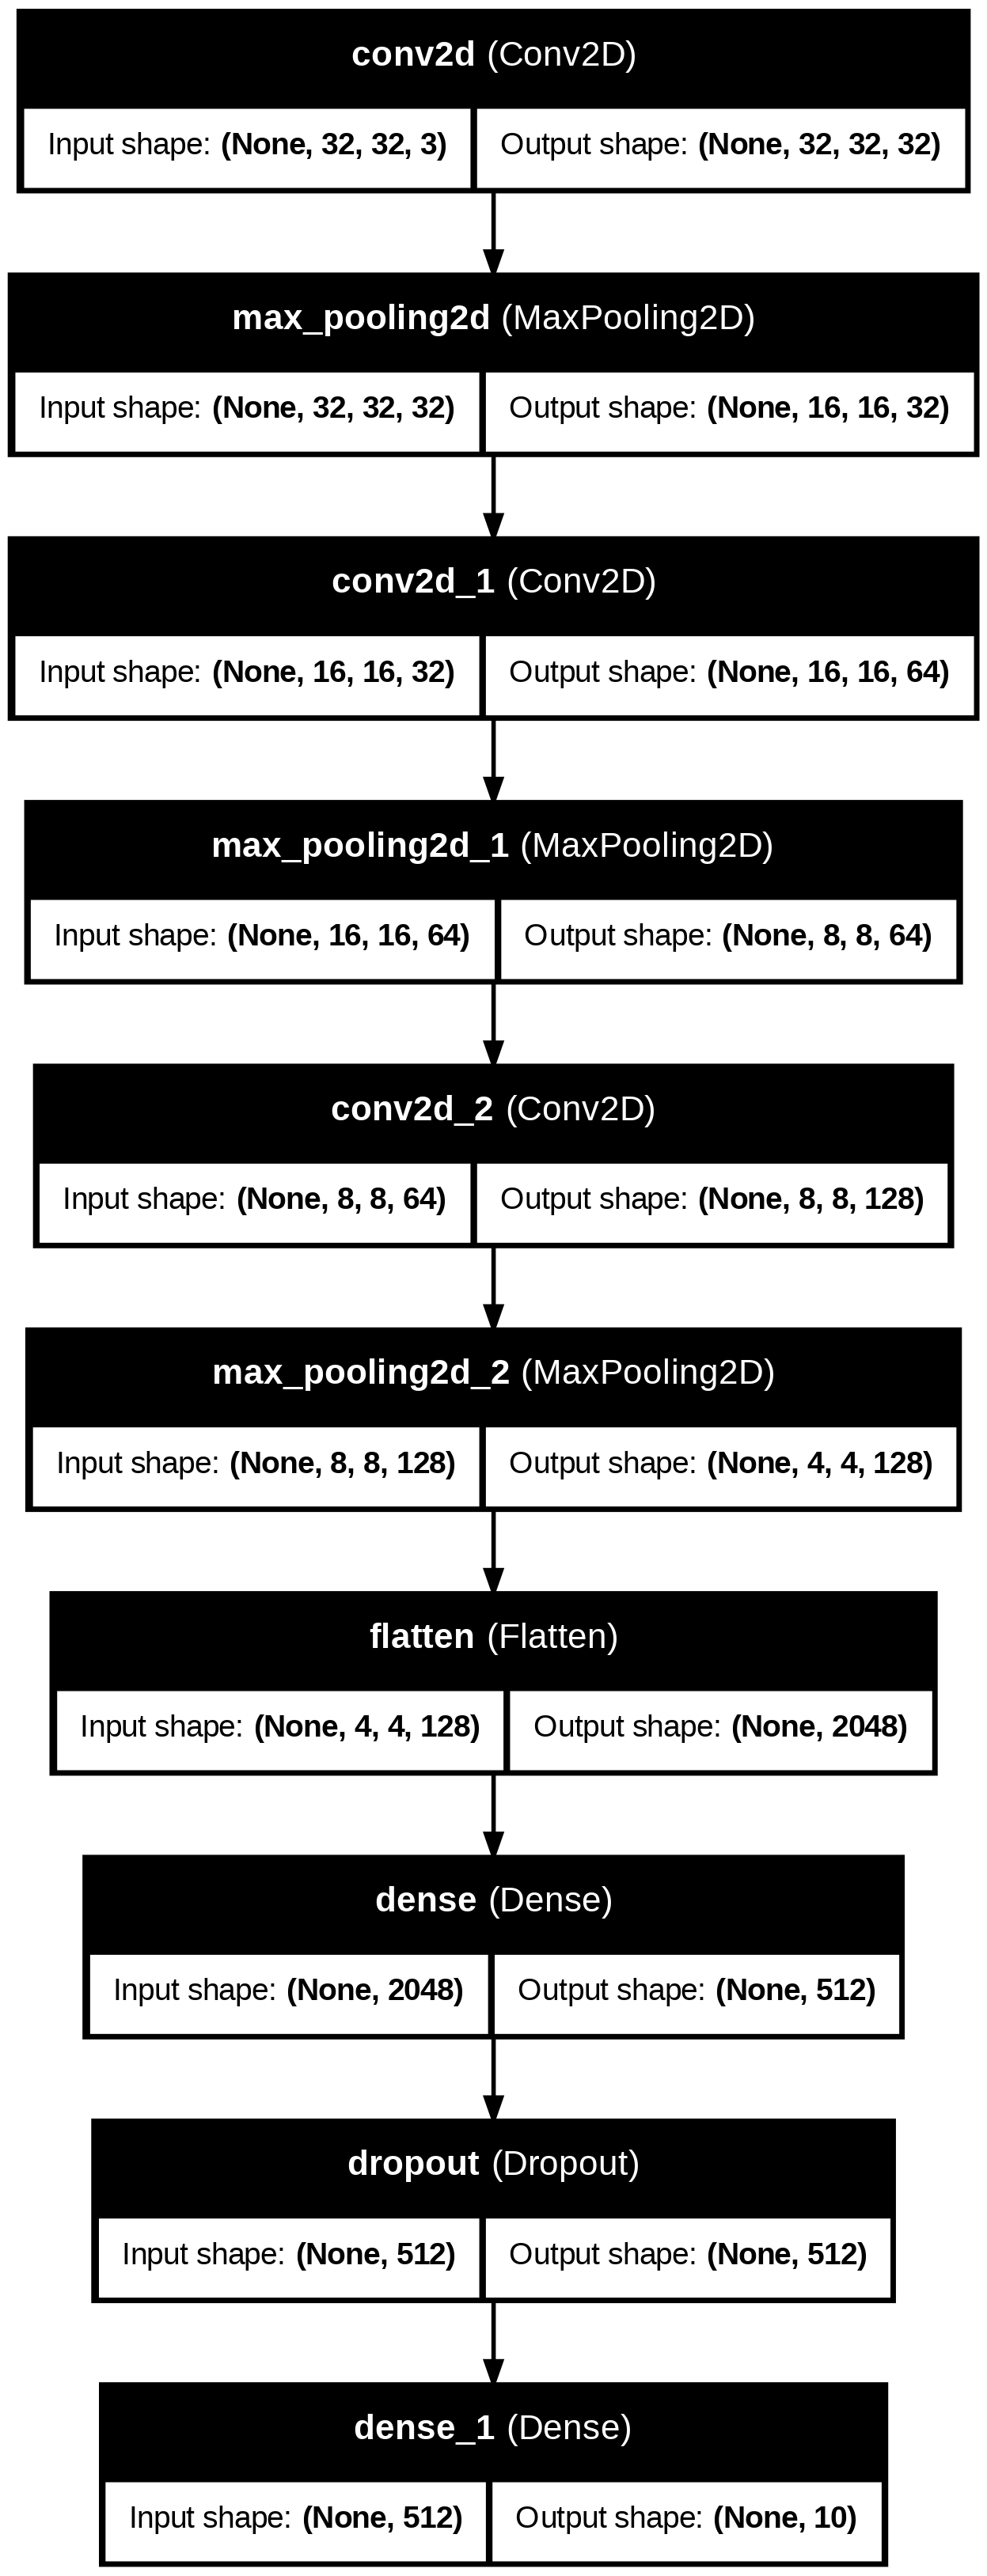

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=True)


Now we are going to use the function to artifiacially increase the number of pictures, see the following link, very smart way to do it
https://www.kaggle.com/code/farzadnekouei/cifar-10-image-classification-with-cnn?scriptVersionId=140376581&cellId=26

In [ ]:
# Ameliorations du modele de base (plus haut) pour depasser les 0.6/0.7 de val_accuracy
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import BatchNormalization

model = Sequential()

#r√©gularisation L2 √† mes couches convolutives pour r√©duire la complexit√© du mod√®le et √©viter qu'il ne sur-apprenne.
model.add(Conv2D(128, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0001), input_shape=(32, 32, 3)))
model.add(BatchNormalization())#La normalisation de lot (BatchNormalization) est une technique
#couramment utilis√©e dans les r√©seaux neuronaux pour acc√©l√©rer l'apprentissage
#et r√©duire la d√©pendance aux initialisations.
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0001)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))  # 256 au lieu de 512
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_generator = ImageDataGenerator(
    rotation_range=10,  # Moins de rotation
    width_shift_range=0.08,  # Moins de d√©calage horizontal
    height_shift_range=0.08,  # Moins de d√©calage vertical
    horizontal_flip=True,  # Conserver le retournement horizontal
    zoom_range=0.05,  # Moins de zoom
    shear_range=5,  # Moins de cisaillement
    channel_shift_range=0.05  # Moins de changement de couleur
)

In [ ]:
# Utilisation de la fontion d'augmentation
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Cr√©ation du g√©n√©rateur √† partir des donn√©es d'entra√Ænement
train_generator = data_generator.flow(X_train, Y_train, batch_size=64)

early_stopping = EarlyStopping(monitor='val_loss', patience=40, restore_best_weights=True, verbose=1)

# Callback pour r√©duire le taux d'apprentissage lorsque la perte de validation stagne
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002),
              metrics=['accuracy'])

model_1 = model.fit(train_generator, #equivalent to X_train, Y_train
                    epochs = 20,
                    callbacks=[early_stopping,reduce_lr] ,# Liste des callbacks, ici avec EarlyStopping
                    steps_per_epoch=len(X_train) // 64, # n√©cessaire pour √©viter une boucle infinie a cause flow() (usual value len(X_train) // batch_size)
                     validation_data=(X_valid, Y_valid))

#### Current version acc_validation = 0.81, quite nice but can do better

"""model_1 = model.fit(X_train, Y_train, #equivalent to X_train, Y_train
                    epochs = 10,
                     validation_data=(X_valid, Y_valid))"""

# FLOW()
# La fonction flow() prend tes donn√©es (x_train, y_train) et applique
# l'augmentation √† la vol√©e (c'est-√†-dire, juste avant que les images soient
# envoy√©es au mod√®le). Elle retourne un g√©n√©rateur, qui fournit des batchs
# d'images augment√©es.

Epoch 1/20
625/625 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 474ms/step - accuracy: 0.7109 - loss: 0.8340Epoch 2/20
625/625 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 320s 495ms/step - accuracy: 0.7198 - loss: 0.8094 - val_accuracy: 0.7304 - val_loss: 0.8037 - learning_rate: 2.0000e-04
Epoch 3/20
625/625 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 324s 498ms/step - accuracy: 0.7264 - loss: 0.7931 - val_accuracy: 0.7211 - val_loss: 0.8557 - learning_rate: 2.0000e-04
Epoch 4/20
625/625 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 319s 510ms/step - accuracy: 0.7406 - loss: 0.7579 - val_accuracy: 0.6854 - val_loss: 1.0286 - learning_rate: 2.0000e-04
Epoch 5/20
625/625 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 310s 491ms/step - accuracy: 0.7501 - loss: 0.7399 - val_accuracy: 0.7554 - val_loss: 0.7415 - learning_rate: 2.0000e-04
Epoch 6/20
625/625 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ

'model_1 = model.fit(X_train, Y_train, #equivalent to X_train, Y_train\n                    epochs = 10,\n                     validation_data=(X_valid, Y_valid))'

Quand on utilise un ImageDataGenerator, les images sont g√©n√©r√©es √† la vol√©e par flow() et envoy√©es au mod√®le par petits groupes (batchs). Mais contrairement √† un entra√Ænement classique avec x_train et y_train, o√π Keras conna√Æt la taille du dataset, ici, il ne sait pas combien d'images sont g√©n√©r√©es par √©poque.
üëâ Il faut donc lui dire combien de batchs utiliser par √©poque.

ReduceLROnPlateau : Si la perte de validation (val_loss) ne s'am√©liore pas apr√®s un certain nombre d'√©poques (patience), ce callback r√©duira le taux d'apprentissage de moiti√© (factor=0.5). Le taux d'apprentissage sera diminu√© jusqu'√† un minimum sp√©cifi√© (min_lr=1e-6).

EarlyStopping : Si la perte de validation (val_loss) ne s'am√©liore pas apr√®s un certain nombre d'√©poques (patience=10), ce callback arr√™tera l'entra√Ænement et reviendra √† l'√©tat du mod√®le avec les meilleurs poids obtenus (gr√¢ce √† restore_best_weights=True).

In [ ]:
accuracy = model_1.history["accuracy"]
val_accuracy = model_1.history["val_accuracy"]
loss = model_1.history["loss"]
val_loss = model_1.history["val_loss"]



###################### Model 1 CNN quite standard => Val_accuracy = 0.74. Train_accuracy = 0.90
#### hyperparameters:
#{loss='categorical_crossentropy',
#              optimizer='Adam',
#              metrics=['accuracy'],
#    epochs = 10}
#### Let's compare using the data_augmentation fucntion and optimizing hyperparameters




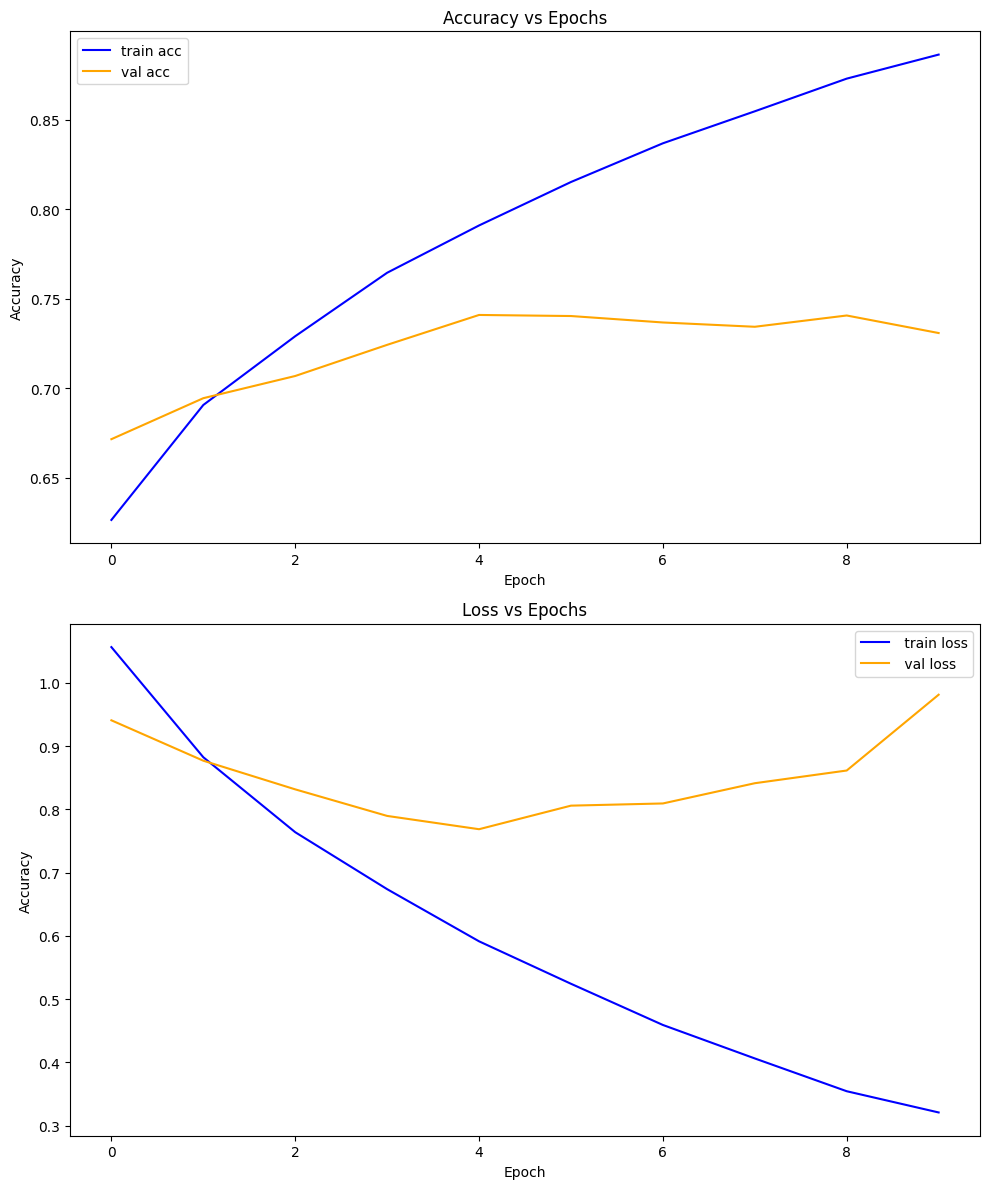

In [ ]:
plt.figure(figsize = (10,12))

plt.subplot(2,1,1)
plt.plot( range(len(accuracy)),accuracy, color = 'blue', label = "train acc")
plt.plot( range(len(val_accuracy)),val_accuracy, color = 'orange', label = "val acc")
plt.title("Accuracy vs Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(2,1,2)
plt.plot( range(len(loss)),loss, color = 'blue', label = " train loss")
plt.plot( range(len(val_loss)),val_loss, color = 'orange', label =" val loss")
plt.title("Loss vs Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()



# Ajuster l'affichage pour √©viter que les titres et axes se chevauchent
plt.tight_layout()
plt.show()


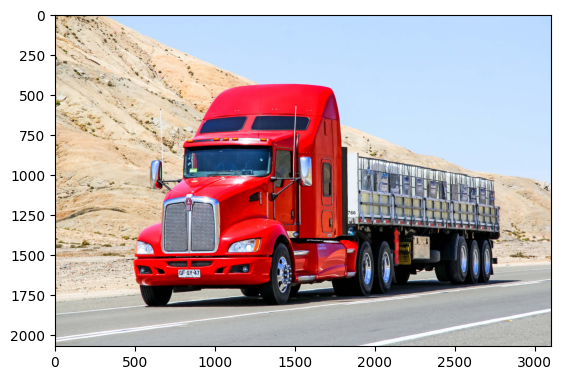

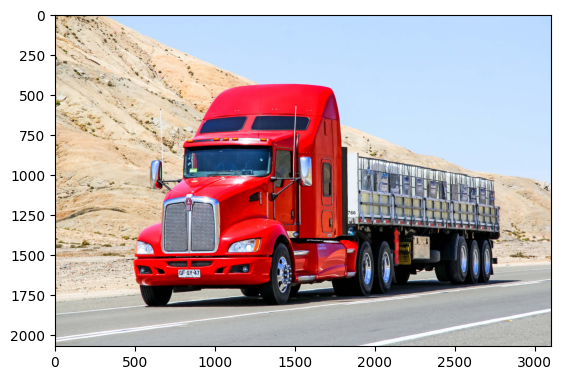

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 42ms/step
Predicted class:  truck


In [ ]:
import cv2

# Chemin de l'image
img_path = "/content/drive/Othercomputers/Mon ordinateur portable/Data Science/CIFAR/truck.jpg"
img = cv2.imread(img_path)

# V√©rifier si l'image est charg√©e
if img is None:
    print("Erreur : L'image n'a pas pu √™tre charg√©e. V√©rifiez le chemin.")
else:
    # Convertir l'image de BGR en RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Afficher l'image pour la visualisation
    plt.imshow(img)
    plt.show()

    # D√©finir les noms des classes
    class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

    # Redimensionner l'image
    img = cv2.resize(img, (32, 32))

    # Convertir l'image en un tableau 4D (batch de 1 image)
    img = img.reshape((1, 32, 32, 3))

    # Normalisation (si le mod√®le l'a demand√© lors de l'entra√Ænement)
    img = img / 255.0

    # Effectuer la pr√©diction
    pred = model.predict(img)

    # Obtenir la classe pr√©dite avec la plus haute probabilit√©
    predicted_class = pred.argmax()

    # Afficher la classe pr√©dite
    print('Predicted class: ', class_names[predicted_class])


1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 30ms/step
Image 1 (truck.jpg): Predicted class - truck


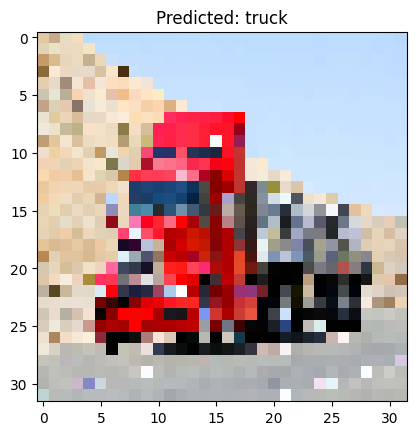

Image 2 (truc2.jpg): Predicted class - airplane


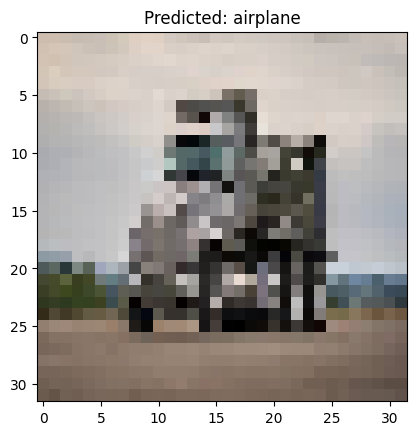

Image 3 (bird.jpg): Predicted class - bird


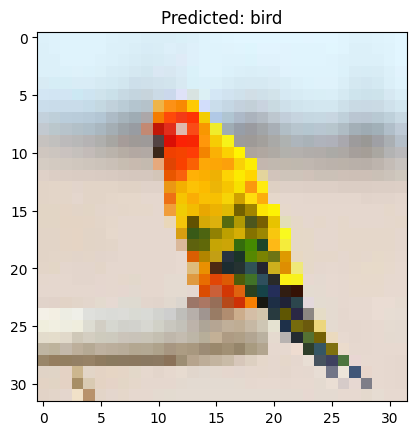

Image 4 (bird2.jpg): Predicted class - bird


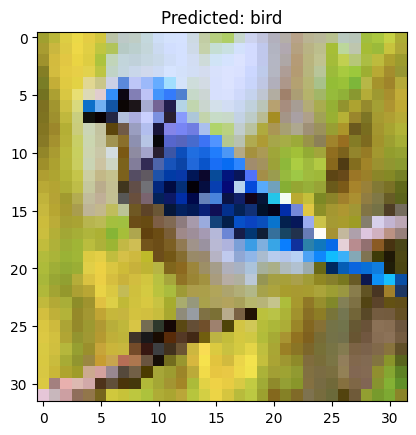

Image 5 (deer2.jpg): Predicted class - airplane


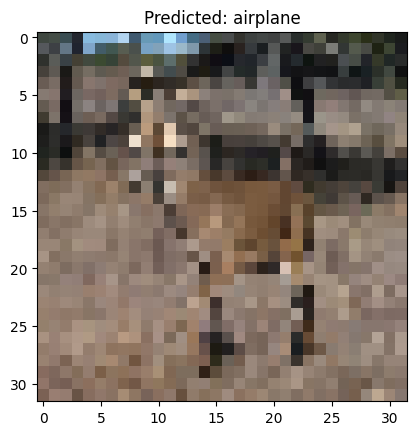

Image 6 (deer.jpg): Predicted class - bird


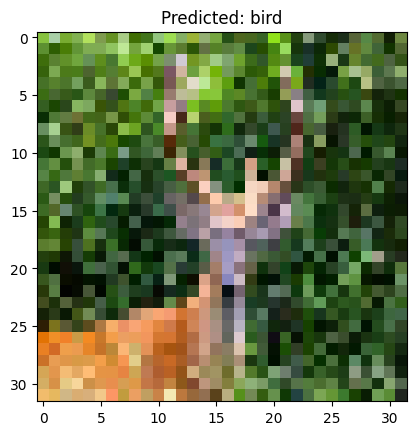

In [ ]:
# Let's do it for a batch of new images
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

path = "/content/drive/Othercomputers/Mon ordinateur portable/Data Science/CIFAR/img_to_score/"
files = os.listdir(path)
files

images = []
for file in files :
  img = cv2.imread(str(path)+file)
  if img is None:
    print("Erreur : L'image n'a pas pu √™tre charg√©e. V√©rifiez le chemin.")
  else:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    #plt.show()
    img = cv2.resize(img, (32, 32))
    #img = img.reshape((1, 32, 32, 3))
    img = img / 255.0
    images.append(img)

images = np.array(images)# Our model only knows nparray
images.shape#(6, 32, 32, 3) good!
# Effectuer la pr√©diction
preds = model.predict(images)
preds

# Afficher les r√©sultats de la pr√©diction
for i, pred in enumerate(preds):
    predicted_class = pred.argmax()  # Trouver l'indice de la classe avec la plus haute probabilit√©
    print(f"Image {i+1} ({files[i]}): Predicted class - {class_names[predicted_class]}")

    # Afficher l'image avec son nom de classe pr√©dit
    plt.imshow(images[i])
    plt.title(f"Predicted: {class_names[predicted_class]}")
    plt.show()




When running the above code, we are setting up a pipeline for preprocessing the images during model training. The generator applies a series of random transformations (specified by the parameters) to the images each time they are loaded into the model for training. Each time an epoch is run during model training, these random transformations will create different variations of the original images. These changes are made on-the-fly and don't modify our original dataset.

In [ ]:
##### 2nd Method Using dense layers as for MNIST ###################
# This method is supposed to be less good than the Convolutional one (CNN)

# Here we need to flatten the images (not like for CNN)
X_train_flattened = X_train.reshape(-1, 32*32*3)  # (50000, 3072)
X_valid_flattened = X_valid.reshape(-1, 32*32*3)    # (10000, 3072)

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Nombre de neurones dans chaque couche cach√©e
n_hidden_1 = 512
n_hidden_2 = 256
n_hidden_3 = 128

# Construction du mod√®le
Inp = Input(shape=(32*32*3,))  # Image aplatie (3072,)

# Couches cach√©es
x = Dense(n_hidden_1, activation='relu', name="Hidden_Layer_1")(Inp)
x = Dense(n_hidden_2, activation='relu', name="Hidden_Layer_2")(x)
x = Dense(n_hidden_3, activation='relu', name="Hidden_Layer_3")(x)

# Couche de sortie (softmax pour classification multi-classe)
output = Dense(10, activation='softmax', name="Output_Layer")(x)  # 10 classes CIFAR-10

# Cr√©ation du mod√®le
model_mlp = Model(inputs=Inp, outputs=output)

# R√©sum√© du mod√®le
model_mlp.summary()


Model: "functional_10"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                         ‚îÉ Output Shape                ‚îÉ         Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ input_layer_1 (InputLayer)           ‚îÇ (None, 3072)                ‚îÇ               0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ Hidden_Layer_1 (Dense)               ‚îÇ (None, 512)                 ‚îÇ       1,573,376 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ Hidden_Layer_2 (Dense)               ‚îÇ (None, 256)                 ‚îÇ         131,328 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ Hidden_Layer_3 (Dense)               ‚îÇ (None, 128)                 ‚îÇ          32,896 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ Output_Layer (Dense)                 ‚îÇ (None, 10)                  ‚îÇ           1,290 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 1,738,890 (6.63 MB)

 Trainable params: 1,738,890 (6.63 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compiler le mod√®le avec l'optimiseur Adam et la perte categorical_crossentropy
model_mlp.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Entra√Æner le mod√®le
model2 = model_mlp.fit(X_train_flattened, Y_train, epochs=10, batch_size=64, validation_data=(X_valid_flattened, Y_valid))


########### CHeck which one is the best bewtween this one and the CNN method #######################

Epoch 1/10
625/625 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 15s 22ms/step - accuracy: 0.5480 - loss: 1.2669 - val_accuracy: 0.4944 - val_loss: 1.4513
Epoch 2/10
625/625 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 11s 18ms/step - accuracy: 0.5552 - loss: 1.2367 - val_accuracy: 0.4879 - val_loss: 1.4615
Epoch 3/10
625/625 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 11s 18ms/step - accuracy: 0.5651 - loss: 1.2111 - val_accuracy: 0.5039 - val_loss: 1.4403
Epoch 4/10
625/625 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 10s 16ms/step - accuracy: 0.5701 - loss: 1.1949 - val_accuracy: 0.4916 - val_loss: 1.4643
Epoch 5/10
625/625 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 11s 17ms/step - accuracy: 0.5831 - loss: 1.1714 - val_accuracy: 0.4972 - val_loss: 1.4643
Epoch 6/10
625/625 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 10s 16ms/step - accuracy: 0.5887 - loss: 1.1515 - val_accuracy: 0.5042

In [ ]:
accuracy = model2.history["accuracy"]
val_accuracy = model2.history["val_accuracy"]
loss = model2.history["loss"]
val_loss = model2.history["val_loss"]

val_accuracy

[0.4943999946117401,
 0.4878999888896942,
 0.5038999915122986,
 0.49160000681877136,
 0.49720001220703125,
 0.5041999816894531,
 0.5072000026702881,
 0.5092999935150146,
 0.4991999864578247,
 0.4821999967098236]

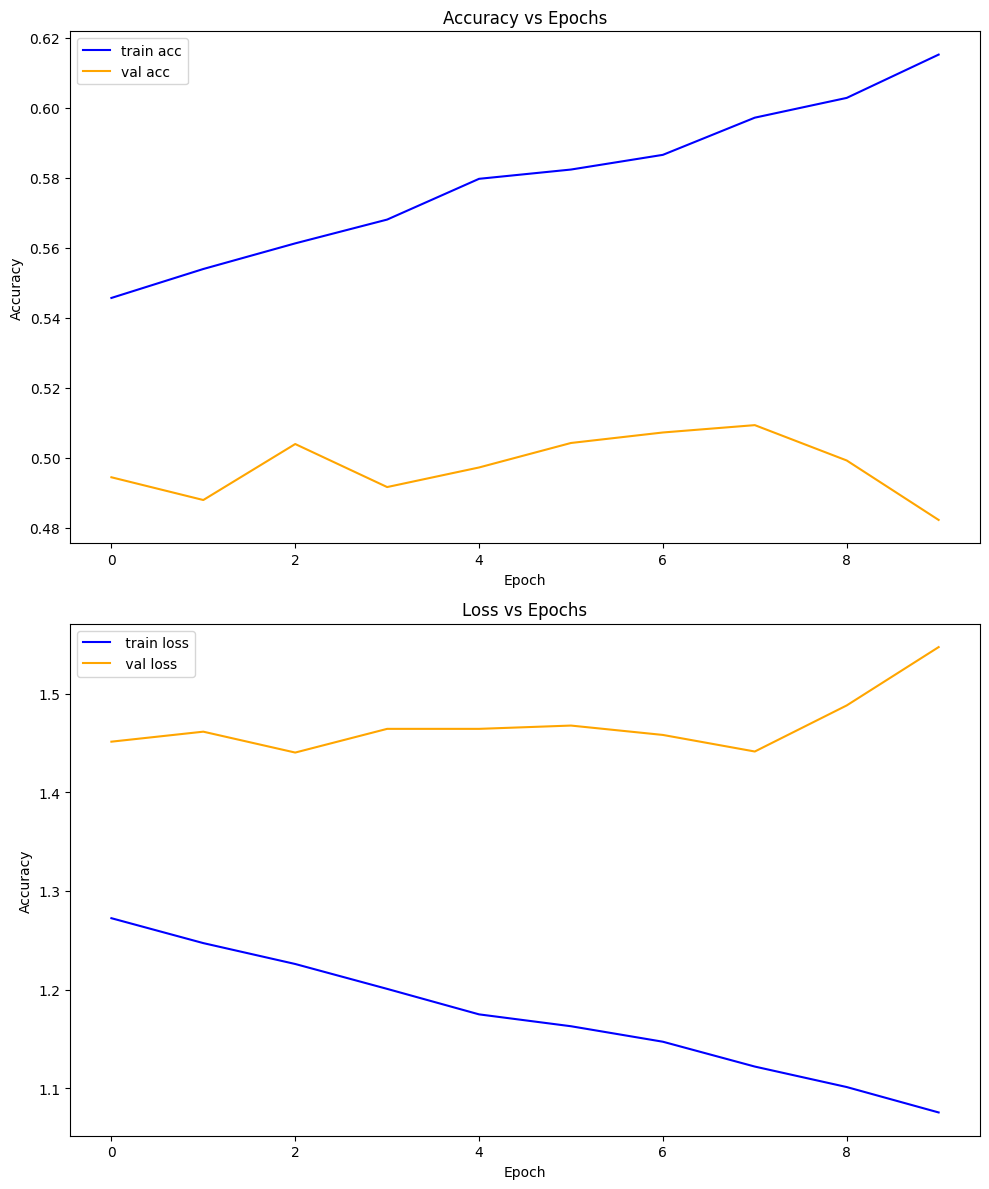

In [ ]:
plt.figure(figsize = (10,12))

plt.subplot(2,1,1)
plt.plot( range(len(accuracy)),accuracy, color = 'blue', label = "train acc")
plt.plot( range(len(val_accuracy)),val_accuracy, color = 'orange', label = "val acc")
plt.title("Accuracy vs Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(2,1,2)
plt.plot( range(len(loss)),loss, color = 'blue', label = " train loss")
plt.plot( range(len(val_loss)),val_loss, color = 'orange', label =" val loss")
plt.title("Loss vs Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()



# Ajuster l'affichage pour √©viter que les titres et axes se chevauchent
plt.tight_layout()
plt.show()


# # Very bad and overfits, CNN far better